In [1]:
import pandas as pd
import mlflow
import dagshub
%matplotlib inline
import matplotlib.pyplot as plt

from tfg_module import my_get_time_series as mgts
from tfg_module import my_azure as maz

In [2]:
dagshub.init(repo_owner='JCOQUE', repo_name='TFG-ingenieria', mlflow=True) 
mlflow.set_tracking_uri('https://dagshub.com/JCOQUE/TFG-ingenieria.mlflow')

Initialized MLflow to track repo "JCOQUE/TFG-ingenieria"

Repository JCOQUE/TFG-ingenieria initialized!

In [3]:
def get_mlflow_pred(url):
    mlflow_pred_csv = mlflow.artifacts.download_artifacts(url)
    mlflow_pred = pd.read_csv(mlflow_pred_csv)
    mlflow_pred.drop(columns = ['Unnamed: 0'], inplace = True)
    return  mlflow_pred

In [4]:
def transform_dataset(dataset):
    dataset = dataset.loc[0:3, :].copy() # only getting the first 4 months, i.e. test size
    dataset['date'] = pd.to_datetime(dataset['date'], format= '%Y-%m-%d')
    dataset['pred'] = dataset['pred'].astype('float32')
    return  dataset

## Compras

In [5]:
train_ts_compras = mgts.get_ts('Compras', type = 'train')
train_ts_compras

,date,Compras
0,2017-09-30,"6,865"
1,2017-10-31,"5,452"
2,2017-11-30,"4,399"
3,2017-12-31,"37,490"
4,2018-01-31,"4,486"
...,...,...
72,2023-09-30,"7,394"
73,2023-10-31,"28,417"
74,2023-11-30,"14,432"
75,2023-12-31,"27,198"


In [6]:
test_ts_compras = mgts.get_ts('Compras', type = 'test')
test_ts_compras

,date,Compras
0,2024-01-31,NaN
1,2024-02-29,"10,422"
2,2024-03-31,"17,173"
3,2024-04-30,"27,871"


In [7]:
TCN_compras_mae = get_mlflow_pred('mlflow-artifacts:/e4812a076abd4294b4e238dc8106ce47/e978fe53b87548658cbf5fc242b00747/artifacts/predictions/TCN_Compras_best_mae.csv')
TCN_compras_mae = transform_dataset(TCN_compras_mae)
TCN_compras_mae

,date,pred
0,2024-01-31,"1,587"
1,2024-02-29,"12,023"
2,2024-03-31,"16,240"
3,2024-04-30,"26,604"


In [8]:
TCN_compras_rmse = get_mlflow_pred('mlflow-artifacts:/e4812a076abd4294b4e238dc8106ce47/887cb4a08b9145f18900dfbd01ff75f4/artifacts/predictions/TCN_Compras_best_rmse.csv')
TCN_compras_rmse = transform_dataset(TCN_compras_rmse)
TCN_compras_rmse

,date,pred
0,2024-01-31,"1,587"
1,2024-02-29,"19,001"
2,2024-03-31,"24,586"
3,2024-04-30,"21,909"


In [9]:
lgbm_compras_mae = get_mlflow_pred('mlflow-artifacts:/25707a52310b4902beafe11b4d03a4e7/045d689e9c034f43a0484c63bcdea891/artifacts/predictions/LightGBM_Compras_best_mae.csv')
lgbm_compras_mae = transform_dataset(lgbm_compras_mae)
lgbm_compras_mae

,date,pred
0,2024-01-31,"1,587"
1,2024-02-29,"13,879"
2,2024-03-31,"12,818"
3,2024-04-30,"15,612"


In [10]:
lgbm_compras_rmse = get_mlflow_pred('mlflow-artifacts:/25707a52310b4902beafe11b4d03a4e7/2df46cf7db164a6290a48344612caa47/artifacts/predictions/LightGBM_Compras_best_rmse.csv')
lgbm_compras_rmse = transform_dataset(lgbm_compras_rmse)
lgbm_compras_rmse

,date,pred
0,2024-01-31,"1,587"
1,2024-02-29,"10,887"
2,2024-03-31,"14,408"
3,2024-04-30,"10,880"


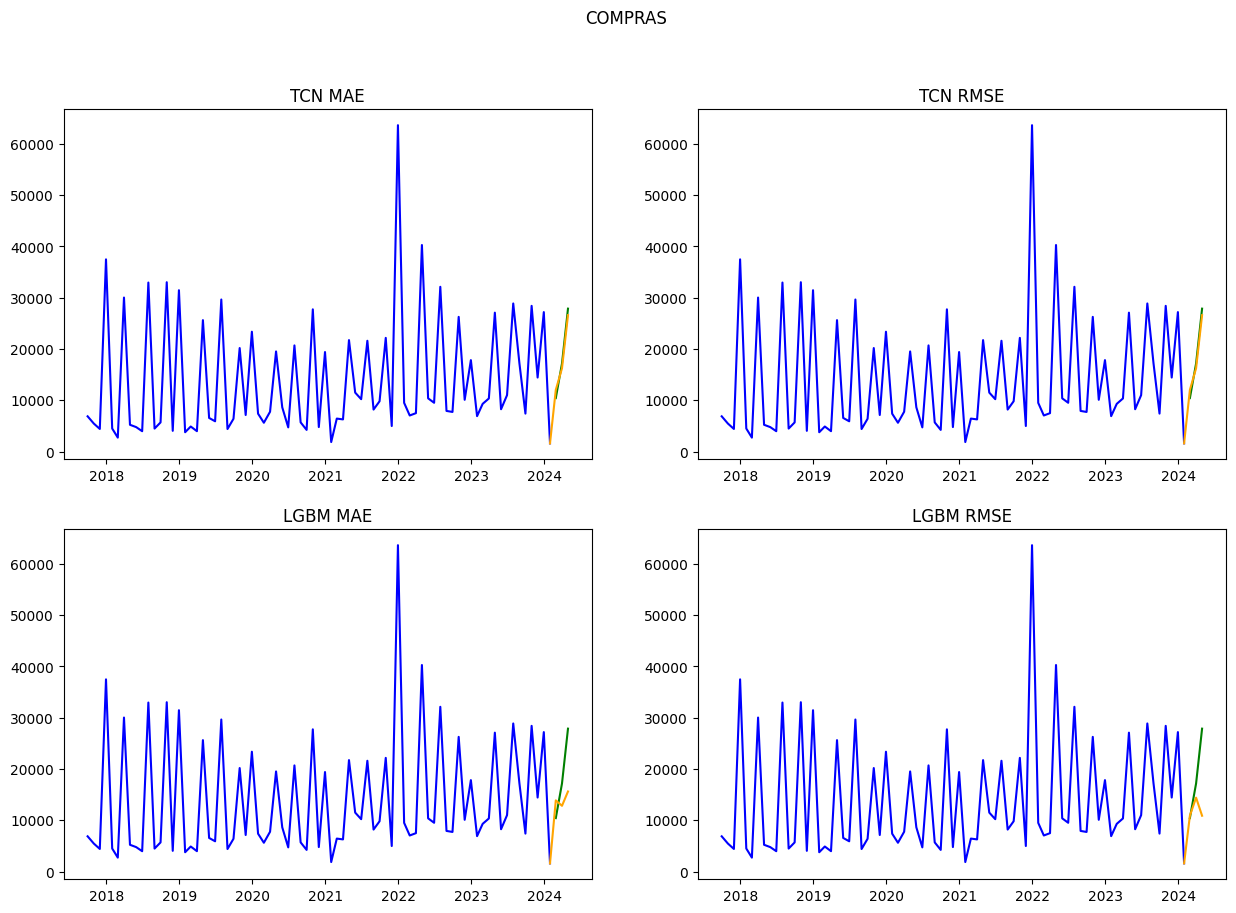

In [11]:
plt.close() # since  in the my_future.py I have the next line: matplotlib.use('Agg'), I need to ensrue plt is empty before plotting
fig, ax = plt.subplots(2,2, figsize = (15,10))

ax[0,0].plot(train_ts_compras['date'], train_ts_compras['Compras'], color = 'blue')
ax[0,0].plot(test_ts_compras['date'], test_ts_compras['Compras'], color = 'green')
ax[0,0].plot(TCN_compras_mae['date'], TCN_compras_mae['pred'], color = 'orange')
ax[0,0].set_title('TCN MAE')

ax[0,1].plot(train_ts_compras['date'], train_ts_compras['Compras'], color = 'blue')
ax[0,1].plot(test_ts_compras['date'], test_ts_compras['Compras'], color = 'green')
ax[0,1].plot(TCN_compras_mae['date'], TCN_compras_mae['pred'], color = 'orange')
ax[0,1].set_title('TCN RMSE')

ax[1,0].plot(train_ts_compras['date'], train_ts_compras['Compras'], color = 'blue')
ax[1,0].plot(test_ts_compras['date'], test_ts_compras['Compras'], color = 'green')
ax[1,0].plot(lgbm_compras_mae['date'], lgbm_compras_mae['pred'], color = 'orange')
ax[1,0].set_title('LGBM MAE')

ax[1,1].plot(train_ts_compras['date'], train_ts_compras['Compras'], color = 'blue')
ax[1,1].plot(test_ts_compras['date'], test_ts_compras['Compras'], color = 'green')
ax[1,1].plot(lgbm_compras_rmse['date'], lgbm_compras_rmse['pred'], color = 'orange')
ax[1,1].set_title('LGBM RMSE')

plt.suptitle('COMPRAS')

plt.show()

In [12]:
# bla bla

In [13]:
modelo_compras_elegido = get_mlflow_pred('mlflow-artifacts:/25707a52310b4902beafe11b4d03a4e7/045d689e9c034f43a0484c63bcdea891/artifacts/predictions/LightGBM_Compras_best_mae.csv')
modelo_compras_elegido = modelo_compras_elegido.loc[4:6, :].copy() #Se predicen los siguientes tres meses
modelo_compras_elegido['date'] = pd.to_datetime(modelo_compras_elegido['date'], format= '%Y-%m-%d')
modelo_compras_elegido['pred'] = modelo_compras_elegido['pred'].astype('float32')
modelo_compras_elegido

,date,pred
4,2024-05-31,"12,784"
5,2024-06-30,"11,782"
6,2024-07-31,"25,396"


## Ventas

In [14]:
train_ts_ventas = mgts.get_ts('Ventas', type = 'train')
train_ts_ventas

,date,Ventas
0,2017-09-30,"5,783"
1,2017-10-31,"20,854"
2,2017-11-30,"14,191"
3,2017-12-31,"7,595"
4,2018-01-31,"12,358"
...,...,...
72,2023-09-30,"16,520"
73,2023-10-31,"17,195"
74,2023-11-30,"13,819"
75,2023-12-31,"21,319"


In [15]:
test_ts_ventas = mgts.get_ts("Ventas", type = 'test')
test_ts_ventas

,date,Ventas
0,2024-01-31,"26,512"
1,2024-02-29,"22,967"
2,2024-03-31,"18,972"
3,2024-04-30,"17,455"


In [16]:
TCN_ventas_mae = get_mlflow_pred('mlflow-artifacts:/24b7234b0fc04727a39b4e7add015333/c41cfa44a29246a580ef87bbd50b963e/artifacts/predictions/TCN_Ventas_best_mae.csv')
TCN_ventas_mae = transform_dataset(TCN_ventas_mae)
TCN_ventas_mae

,date,pred
0,2024-01-31,"15,795"
1,2024-02-29,"20,402"
2,2024-03-31,"16,217"
3,2024-04-30,"20,495"


In [17]:
TCN_ventas_rmse = get_mlflow_pred('mlflow-artifacts:/24b7234b0fc04727a39b4e7add015333/ec9b782d2ae54eb8bb039a9b6a968d6f/artifacts/predictions/TCN_Ventas_best_rmse.csv')
TCN_ventas_rmse = transform_dataset(TCN_ventas_rmse)
TCN_ventas_rmse

,date,pred
0,2024-01-31,"15,795"
1,2024-02-29,"20,428"
2,2024-03-31,"15,138"
3,2024-04-30,"19,853"


In [18]:
lgbm_ventas_mae = get_mlflow_pred('mlflow-artifacts:/703c637793b24acb87079f949bd98ee1/6738197386ad45f7bcf1dc2316b8667e/artifacts/predictions/LightGBM_Ventas_best_mae.csv')
lgbm_ventas_mae = transform_dataset(lgbm_ventas_mae)
lgbm_ventas_mae

,date,pred
0,2024-01-31,"15,795"
1,2024-02-29,"14,273"
2,2024-03-31,"14,273"
3,2024-04-30,"14,273"


In [19]:
lgbm_ventas_rmse = get_mlflow_pred('mlflow-artifacts:/703c637793b24acb87079f949bd98ee1/a53d90f83a834569bbc590444f751533/artifacts/predictions/LightGBM_Ventas_best_rmse.csv')
lgbm_ventas_rmse = transform_dataset(lgbm_ventas_rmse)
lgbm_ventas_rmse

,date,pred
0,2024-01-31,"15,795"
1,2024-02-29,"14,297"
2,2024-03-31,"14,297"
3,2024-04-30,"14,297"


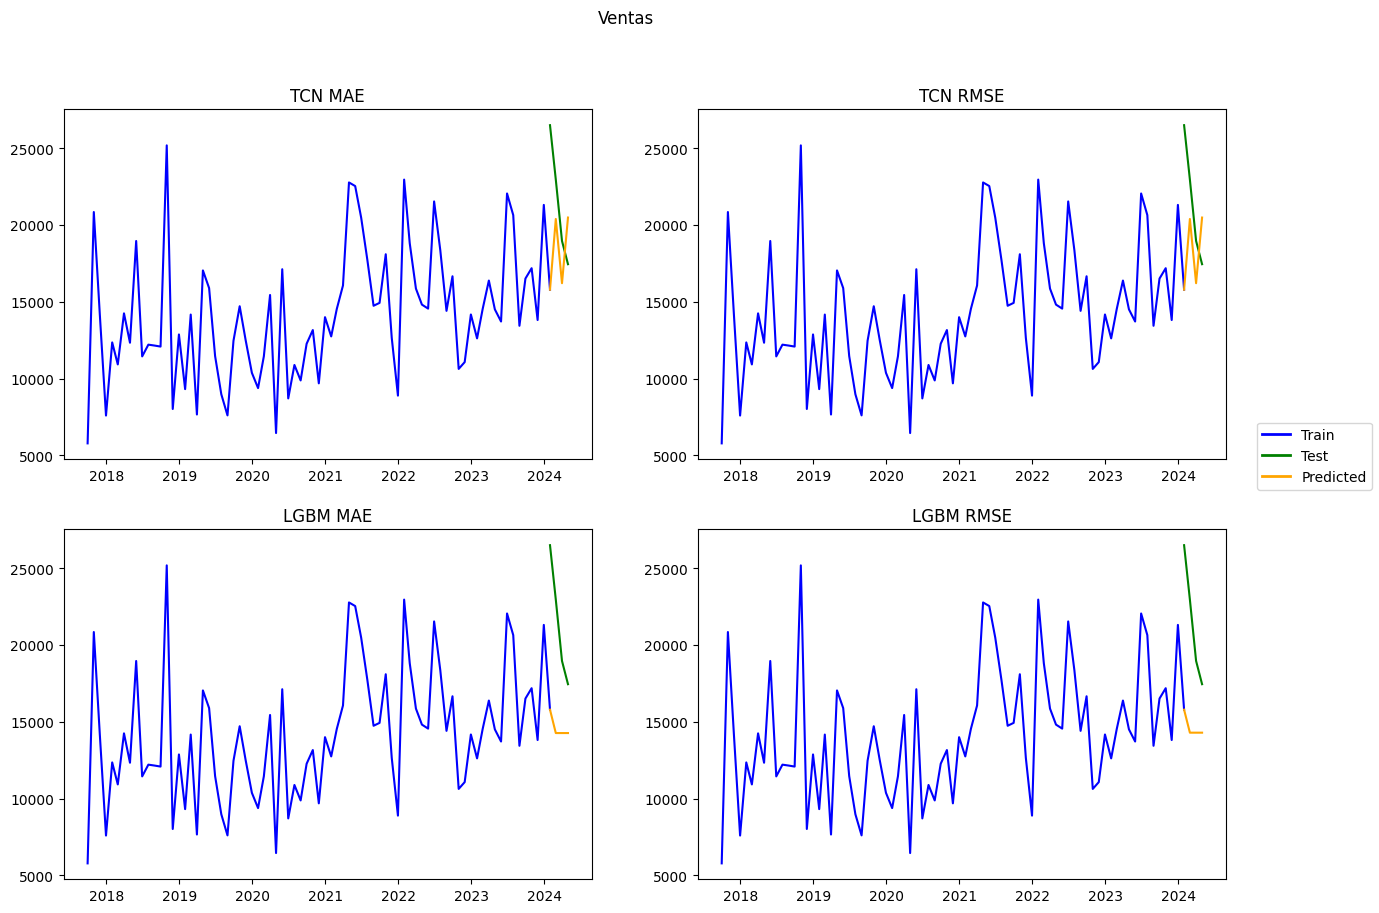

In [20]:
plt.close() # since  in the my_future.py I have the next line: matplotlib.use('Agg'), I need to ensrue plt is empty before plotting
fig, ax = plt.subplots(2,2, figsize = (15,10))

ax[0,0].plot(train_ts_ventas['date'], train_ts_ventas['Ventas'], color = 'blue')
ax[0,0].plot(test_ts_ventas['date'], test_ts_ventas['Ventas'], color = 'green')
ax[0,0].plot(TCN_ventas_mae['date'], TCN_ventas_mae['pred'], color = 'orange')
ax[0,0].set_title('TCN MAE')

ax[0,1].plot(train_ts_ventas['date'], train_ts_ventas['Ventas'], color = 'blue')
ax[0,1].plot(test_ts_ventas['date'], test_ts_ventas['Ventas'], color = 'green')
ax[0,1].plot(TCN_ventas_mae['date'], TCN_ventas_mae['pred'], color = 'orange')
ax[0,1].set_title('TCN RMSE')

ax[1,0].plot(train_ts_ventas['date'], train_ts_ventas['Ventas'], color = 'blue')
ax[1,0].plot(test_ts_ventas['date'], test_ts_ventas['Ventas'], color = 'green')
ax[1,0].plot(lgbm_ventas_mae['date'], lgbm_ventas_mae['pred'], color = 'orange')
ax[1,0].set_title('LGBM MAE')

ax[1,1].plot(train_ts_ventas['date'], train_ts_ventas['Ventas'], color = 'blue')
ax[1,1].plot(test_ts_ventas['date'], test_ts_ventas['Ventas'], color = 'green')
ax[1,1].plot(lgbm_ventas_rmse['date'], lgbm_ventas_rmse['pred'], color = 'orange')
ax[1,1].set_title('LGBM RMSE')

plt.suptitle('Ventas')

lines = [plt.Line2D([0], [0], color='blue', lw=2),
         plt.Line2D([0], [0], color='green', lw=2),
         plt.Line2D([0], [0], color='orange', lw=2)]
labels = ['Train', 'Test', 'Predicted']

fig.legend(lines, labels, loc='center right')

plt.show()

In [21]:
# bla bla

In [22]:
modelo_ventas_elegido = get_mlflow_pred('mlflow-artifacts:/24b7234b0fc04727a39b4e7add015333/ec9b782d2ae54eb8bb039a9b6a968d6f/artifacts/predictions/TCN_Ventas_best_rmse.csv')
modelo_ventas_elegido = modelo_ventas_elegido.loc[4:6, :].copy() #Se predicen los siguientes tres meses
modelo_ventas_elegido['date'] = pd.to_datetime(modelo_ventas_elegido['date'], format= '%Y-%m-%d')
modelo_ventas_elegido['pred'] = modelo_ventas_elegido['pred'].astype('float32')
modelo_ventas_elegido

,date,pred
4,2024-05-31,"15,725"
5,2024-06-30,"19,365"
6,2024-07-31,"16,243"


In [23]:
final =maz.prepare_push_dataset(modelo_compras_elegido,
                          modelo_ventas_elegido)

In [24]:
final

,ID,Fecha,Cuenta,NoCuenta,Debe,Haber,Entidad,Compras,Ventas,NoGrupo,type
0,0,25/09/2017,Capital social,100,0,"1,500",Allison Hill,0,0,100,Actual
1,1,25/09/2017,BBVA,572,"1,500",0,Allison Hill,0,0,500,Actual
2,2,25/09/2017,Capital social,100,0,"1,500",Noah Rhodes,0,0,100,Actual
3,3,25/09/2017,BBVA,572,"1,500",0,Noah Rhodes,0,0,500,Actual
4,4,25/09/2017,Acreedores por prestaciones de servicios (euros),410,0,223,Angie Henderson,0,0,400,Actual
...,...,...,...,...,...,...,...,...,...,...,...
39676,39676,31/05/2024,missing,missing,0,0,missing,0,"15,725",missing,Predicted
39677,39677,30/06/2024,missing,missing,0,0,missing,"11,782",0,missing,Predicted
39678,39678,30/06/2024,missing,missing,0,0,missing,0,"19,365",missing,Predicted
39679,39679,31/07/2024,missing,missing,0,0,missing,"25,396",0,missing,Predicted


In [25]:
maz.push_dataset()

In [26]:
final['ID'].duplicated().any()

False

In [27]:
final.isna().any()

ID          False
Fecha       False
Cuenta      False
NoCuenta    False
Debe        False
Haber       False
Entidad     False
Compras     False
Ventas      False
NoGrupo     False
type        False
dtype: bool